<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique" data-toc-modified-id="Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique-1">Projet 3 : Concevez une application au service de la santé publique</a></span></li><li><span><a href="#Nettoyage-du-dataset" data-toc-modified-id="Nettoyage-du-dataset-2">Nettoyage du dataset</a></span><ul class="toc-item"><li><span><a href="#Ressources-/-Bibliographie-:" data-toc-modified-id="Ressources-/-Bibliographie-:-2.1">Ressources / Bibliographie :</a></span></li><li><span><a href="#Liens-utiles" data-toc-modified-id="Liens-utiles-2.2">Liens utiles</a></span></li><li><span><a href="#Contexte" data-toc-modified-id="Contexte-2.3">Contexte</a></span></li><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-2.4">Objectifs</a></span></li><li><span><a href="#Conclusion-(partie-1)" data-toc-modified-id="Conclusion-(partie-1)-2.5">Conclusion (partie 1)</a></span></li><li><span><a href="#1.-Proportion-de-valeurs-nulles" data-toc-modified-id="1.-Proportion-de-valeurs-nulles-2.6">1. Proportion de valeurs nulles</a></span></li><li><span><a href="#2.-Sélection-des-variables" data-toc-modified-id="2.-Sélection-des-variables-2.7">2. Sélection des variables</a></span></li><li><span><a href="#3.-Retrait-des-doublons-et-lignes-nulles" data-toc-modified-id="3.-Retrait-des-doublons-et-lignes-nulles-2.8">3. Retrait des doublons et lignes nulles</a></span></li><li><span><a href="#4.-Traitement-des-outliers" data-toc-modified-id="4.-Traitement-des-outliers-2.9">4. Traitement des outliers</a></span></li><li><span><a href="#5.-Imputation-des-valeurs-manquantes" data-toc-modified-id="5.-Imputation-des-valeurs-manquantes-2.10">5. Imputation des valeurs manquantes</a></span></li><li><span><a href="#6.-Conclusion" data-toc-modified-id="6.-Conclusion-2.11">6. Conclusion</a></span></li></ul></li></ul></div>

# Projet 3 : Concevez une application au service de la santé publique

# Nettoyage du dataset

## Ressources / Bibliographie : 
 - ACP : http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf
 - ACP : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees
 - Nutri Score Santé Publique France : https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/
 - Déclaration nutritionnelle sur les denrées alimentaires : https://www.economie.gouv.fr/dgccrf/Publications/Vie-pratique/Fiches-pratiques/declaration-nutritionnelle-sur-denrees-alimentaires
 - Why using KNN ? : https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637
 - Imputer : https://www.youtube.com/watch?v=QVEJJNsz-eM&t=90s
 - KNN Classifier = https://www.youtube.com/watch?v=P6kSc3qVph0&t=1s
 - Statistical data preparation: management of missing values and outliers (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5548942/)
 - Feature selection method : https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e


## Liens utiles

- Liens vers la base de données : https://world.openfoodfacts.org/
- Liens vers la définition des variables : https://world.openfoodfacts.org/data/data-fields.txt

## Contexte

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

Cette application serait basée sur le jeu de données Open Food Fact. C'est une base de données qui regroupe des informations et des données sur les denrées et produits alimentaires issus du monde entier.

## Objectifs

Les principaux objectifs sont :
- dans un premier temps, de nettoyer et analyser la base de données Open Food Fact,
- dans un second temps, d'élaborer une idée d'application à partir du jeu de données traité

## Conclusion (partie 1)

Après nettoyage et sélection des colonnes pertinentes et de celles contenant suffisamment de données, seulement 10 variables ont été retenues sur 181. Elles se référent aux principales valeurs nutritionnelles indiquées sur les emballages des denrées alimentaires. Le dataset df3 crée sera utilisé dans le deuxième notebook pour être analysé. Ces analyses serviront à l'élaboration d'une idée d'application.

In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [2]:
# Lecture du dataset
df_data = pd.read_csv(
    r"C:\Users\valen\Desktop\Formation Data Scientist\P3\Data\en.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

In [3]:
# Affichage des 3 premières lignes du dataset
df_data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


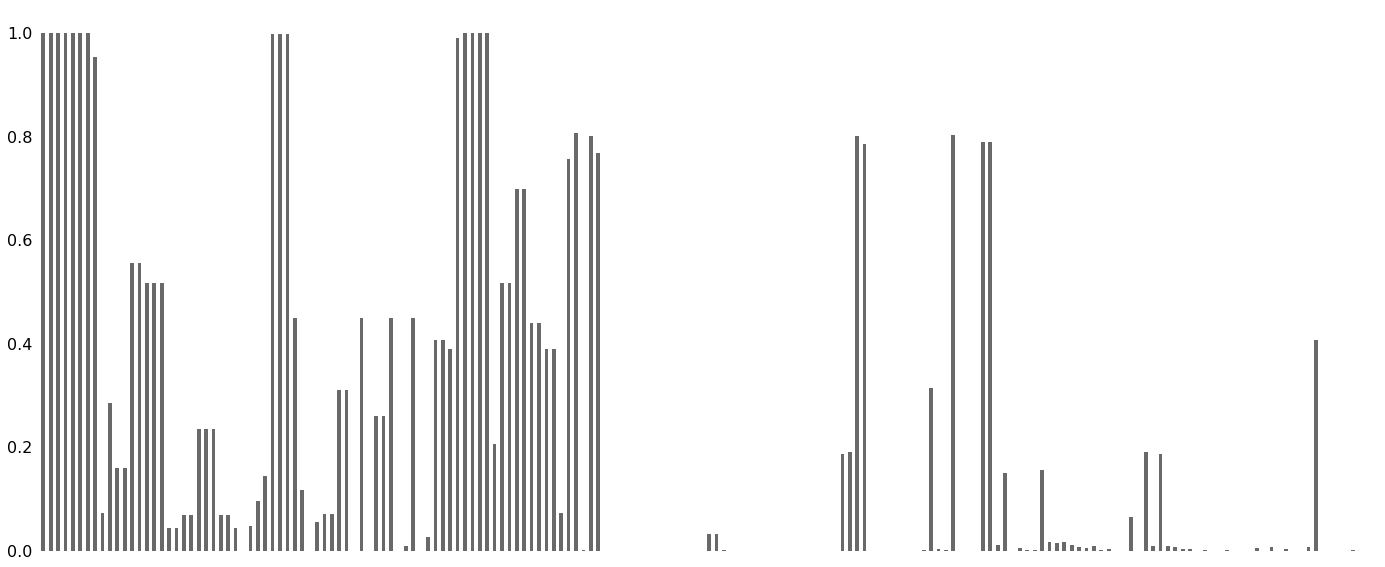

In [4]:
import missingno as msno 
#msno.bar(df_data) 

In [5]:
# Modification des options d'affichage du dataset
pd.set_option('display.max_column', 181)

In [6]:
# Affichage des informations sur la nature des données du dataset
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406038 entries, 0 to 1406037
Columns: 181 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(57)
memory usage: 1.9+ GB
None


Il y a 181 variables dont 122 float64, 2 int64 et 57 object.

## 1. Proportion de valeurs nulles

In [7]:
# Création d'une fonction permettant de visualiser le taux de remplissage par variable

def prop(df, figsize):
    
    # Affichage de la forme du dataset
    print("Le dataset contient {} lignes et {} colonnes.".format(df.shape[0], df.shape[1]))
    
    # Proportion de valeurs nulles
    prop_nan_df = df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Il y a {:.2f}% de NaN.'.format(prop_nan_df))
    
    # Visualisation des valeurs non nulles
    df_null=(df.notnull().sum()/df.shape[0]).sort_values(ascending=False)*100
    
    # Création de la figure
    plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    ax=sns.barplot(x=df_null.values, y=df_null.index, orient='h')
    plt.title('Proportion de valeurs présentes par colonne')
    plt.xticks(rotation=0)
    plt.ylabel("Nom de la colonne")
    plt.xlabel('Pourcentage de valeurs présentes (%)')

    # Affichage de la valeur à côté des barres
    for index, value in enumerate(df_null.values):
        plt.text(value, index+0.4, str(value.round(2)))

    plt.show()

Le dataset contient 1406038 lignes et 181 colonnes.
Il y a 78.59% de NaN.


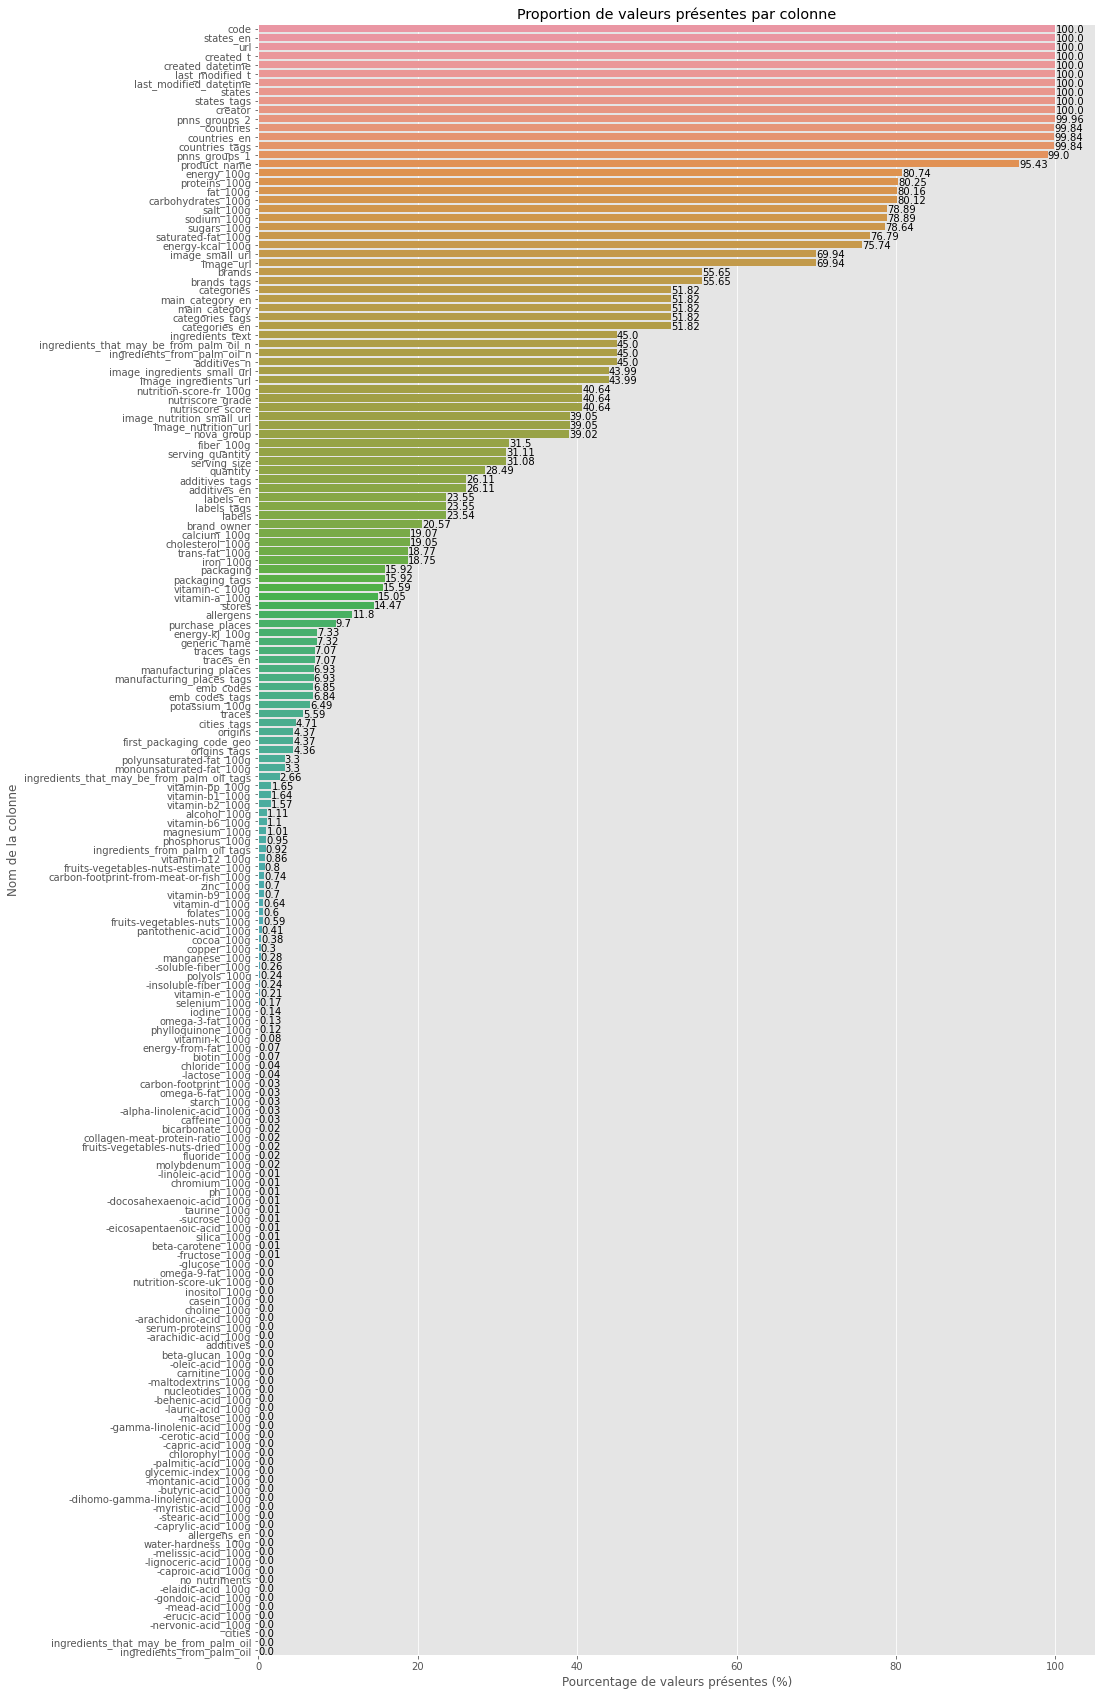

In [8]:
#prop(df_data, figsize=(15, 30))

Beaucoup de variables nutrionnelles sont très peu renseignées. Ils correspondent à des nutriments dont la réglementation européenne n'oblige pas leurs indications sur le packaging. Ils ne rentrent pas nécessairement dans le calcul du nutriscore. Il n'est donc pas utile de les conserver.

Pour rappel le nutri score est calculé de la manière suivante :

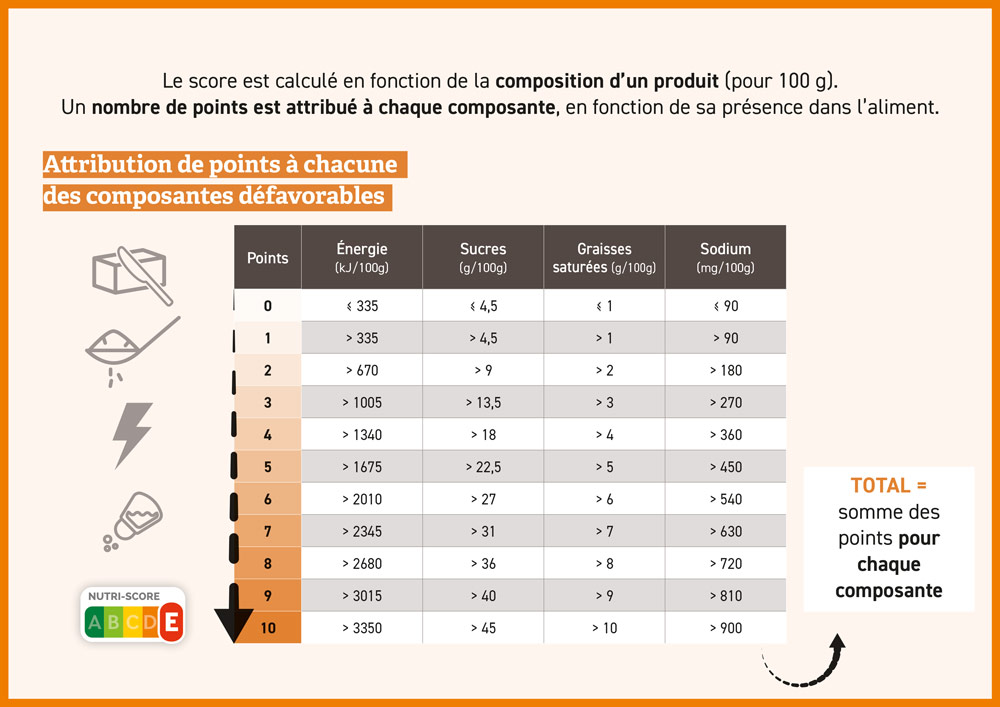

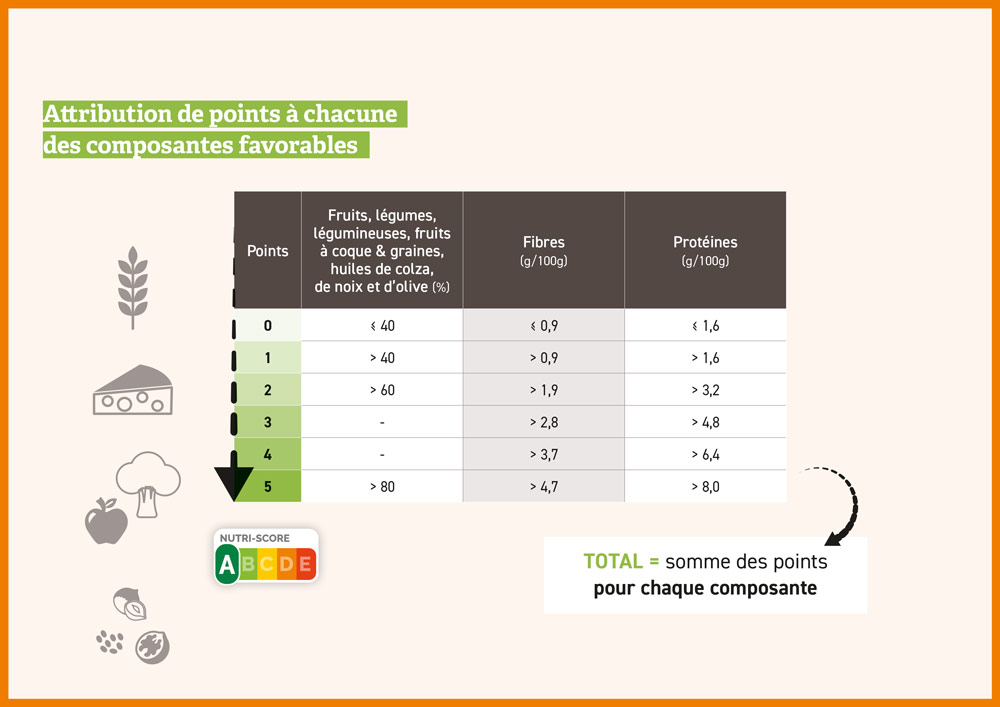

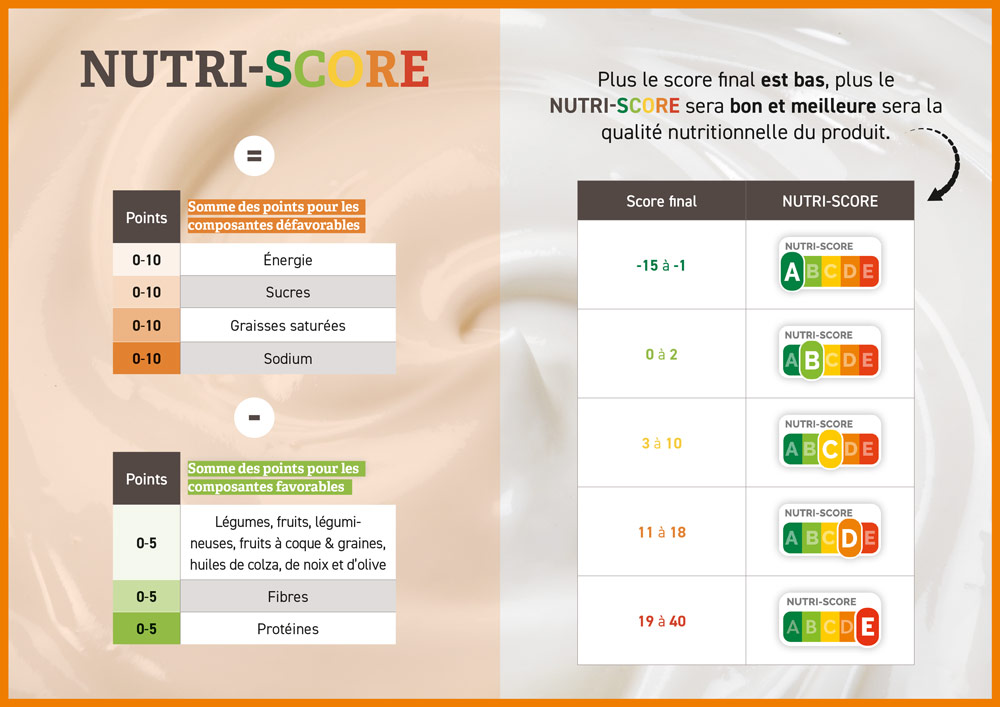

Le nutri score est calculé à partir des taux de sucre, graisses saturées, sodium, légumes/fruits (dont huiles végétales et légumineuses,...), fibres, protéines et enfin l'énergie fournie. Un nombre de points est attribué à chacun de ces aliments. 

La sommes des points attribués aux composantes favorables est calculé, de même pour les composantes défavorables. Le nutri score correspond donc à la différence de ces deux sommes : somme points composantes défavorables - somme points composantes favorables. Le résultat obtenue est encodé sous forme d'une lettre allant de A à E comme le montre le schéma ci-dessus.

## 2. Sélection des variables

Les variables d'intérêt au vu du projet ainsi que celles possédant un taux de remplissage conséquent sont sélectionnées.

In [9]:
# Sélection des colonnes renseignées à plus de 20%
df_data_2 = df_data[df_data.columns[(df_data.notnull().sum()/df_data.shape[0]) > 0.2]]

In [10]:
# Sélection des variables nutrionnelles et nutri-scores (colonnes finissant par "_100g")
df_data_2 = df_data_2.loc[:, df_data_2.columns.str.endswith("_100g")]
df_data_2

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840,18.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1406033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406034,100.0,418.0,12.0,1.00,2.0,1.0,NaN,1.0,1.00,0.400,NaN
1406035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406036,24.0,100.0,0.3,0.00,2.4,0.6,NaN,1.6,0.64,0.256,NaN


Après une première phase de nettoyage on peut remarquer que les variables nutrionnelles les plus renseignées correspondent à celles utilisées dans le calcul du nutriscore. Cependant la variable taux de légumes/fruits (dont huiles végétales et légumineuses,...) n'apparaît plus. En effet, cette dernière était renseignée à seulement 0.8%.

Extrait de la déclaration nutritionnelle sur les denrées alimentaires


"Le contenu de la déclaration nutritionnelle obligatoire inclut les éléments suivants : la valeur énergétique, la quantité des matières grasses, d’acides gras saturés, de glucides, de sucres, de protéines et de sel.

A noter que l’on entend par sel la teneur en équivalent sel calculée à l’aide de la formule :

sel = sodium × 2,5."

D'après cette information les composantes sel et sodium sont strictement corollées donc une des deux peut être retirée.

De plus il n'est pas nécessaire de converver deux variables énergie étant donné qu'elles ont uniquement une différence d'unité.

In [11]:
# Retrait des variables similaires
df_data_2.drop(['energy-kcal_100g', 'salt_100g'], axis=1,  inplace=True)

## 3. Retrait des doublons et lignes nulles

In [12]:
# Retrait des lignes contenant uniquement des valeurs nulles
df_data_2.dropna(axis=0, inplace=True, how='all')

In [13]:
# Retrait des lignes doublons
df_data_2.drop_duplicates(inplace=True)

## 4. Traitement des outliers

In [14]:
# Affichage des valeurs maximales prises par chaque variable
for col in df_data_2:
    print(f'{df_data_2[col].name:-<50} {round(df_data_2[col].max(),2)}')

energy_100g--------------------------------------- 6.66555888888889e+42
fat_100g------------------------------------------ 153679.46
saturated-fat_100g-------------------------------- 136000000238419.0
carbohydrates_100g-------------------------------- 4800.0
sugars_100g--------------------------------------- 4800.0
fiber_100g---------------------------------------- 2020.0
proteins_100g------------------------------------- 31000.0
sodium_100g--------------------------------------- 42000.0
nutrition-score-fr_100g--------------------------- 40.0


Mises à part les variables nutriscore et énergie, les autres variables nutritionnelles ne sont pas supposés dépasser la valeur de 100g. De plus un adulte moyen consomme en moyenne 2000 kcal par jour (soit environ 8400 kJ). En ce qui concerne la variable énergie, il y a donc une très forte probabilité que les valeurs supérieures ou égales à 8400 soient des outliers.

Le nutriscore quant à lui, est compris entre -15 et 40.

In [15]:
# Création de la liste des variables
liste_var = (list(df_data_2.columns))

# Retrait des variables energy et nutriscore de la liste des variables
liste_var.remove('energy_100g')
liste_var.remove('nutrition-score-fr_100g')

# Dataframe avec variables energy et nutriscore retirées
df_data_2_var_removed = df_data_2.loc[:,liste_var]

In [16]:
# Remplacement des valeurs aberrantes par Nan
df_data_2[(df_data_2['energy_100g'] > 8400) | (df_data_2['energy_100g'] < 0)] = np.nan
df_data_2[(df_data_2['nutrition-score-fr_100g'] > 40) | (df_data_2['nutrition-score-fr_100g'] < -15)] = np.nan

for col in df_data_2_var_removed:
    df_data_2_var_removed[(df_data_2_var_removed[col] > 100) | (df_data_2_var_removed[col] < 0)] = np.nan 

In [17]:
# Dataframe retiré de ses valeurs aberrantes
df = pd.concat([df_data_2.loc[:,['energy_100g', 'nutrition-score-fr_100g']], df_data_2_var_removed], axis =1)

In [18]:
# Visualisation de la distribution des variables
def distribution(data):
    plt.figure(figsize=(13, 20))
    for i, col in enumerate(data) :
        plt.subplot(5,2,i+1)
        data[col].hist(density=False, bins=30, color='forestgreen', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequence')
        plt.style.use('ggplot')
    plt.show()

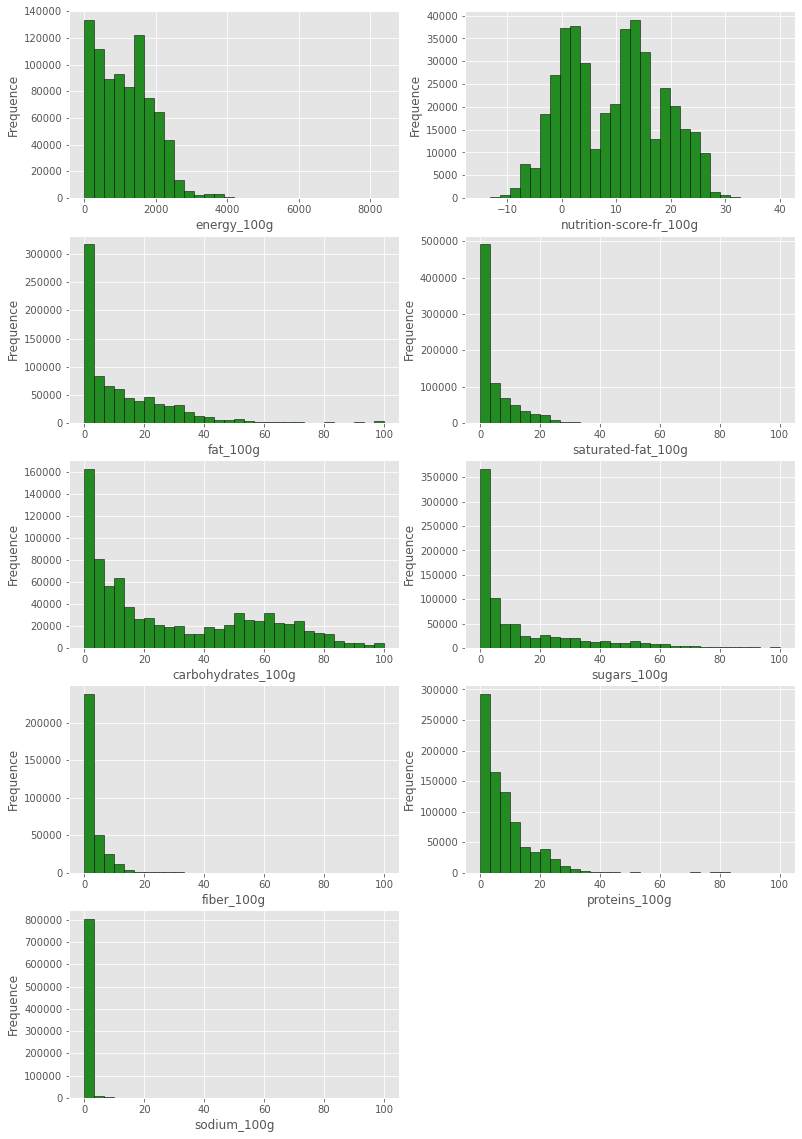

In [19]:
# Visualisation de la distribution des variables après retrait des valeurs aberrantes
distribution(df)

In [20]:
# Retrait des outliers tel que |Z-score| > 3 par Nan
for col in df :
    df[col] = df[col].mask(df[col].sub(df[col].mean()).div(df[col].std()).abs().gt(3))

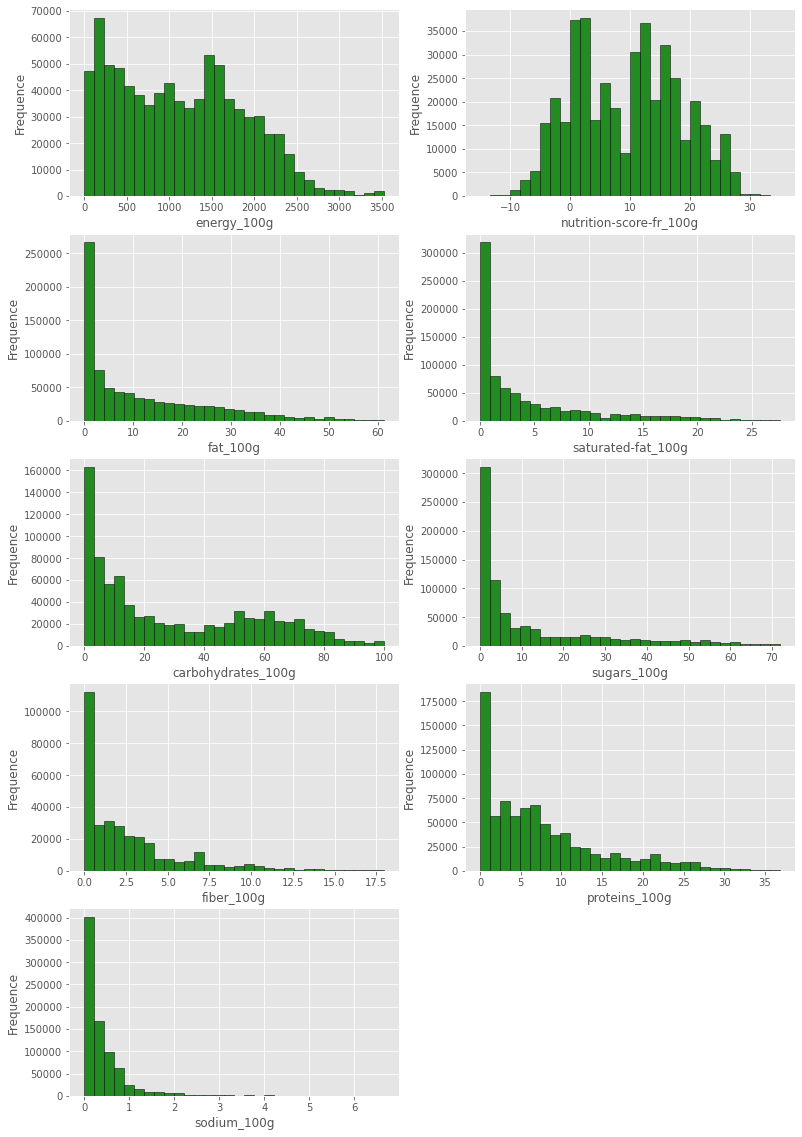

In [21]:
# Visualisation de la distribution des variables après retrait des outliers tel que |Z-score| > 3 par Nan
distribution(df)

Le retrait des valeurs tel que  |Z-score| > 3 apporte plus de cohérence aux distribution des variables. 

En effet, il est en théorie possible qu'une denrée alimentaire contienne par exemple, plus de 50g de sodium pour 100g de produit ou encore un taux de 70g de protéine. Cependant on peut considérer qu'il existe peu de denrée alimentaire contenant une forte proportion d'un des nutriments étudiés ci-dessus. Cela pourrait être éventuellement le cas pour les sucreries qui peuvent contenir beaucoup de sucre.

## 5. Imputation des valeurs manquantes

In [22]:
# Définition de l'imputer
imputer = IterativeImputer(random_state=0)

# Fit sur le dataset df
imputer.fit(df)

# Transformation de df
df2 = pd.DataFrame(imputer.transform(df), columns=df.columns)

# Vérification de la présence de Nan
df2.isna().sum()

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


energy_100g                0
nutrition-score-fr_100g    0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
sodium_100g                0
dtype: int64

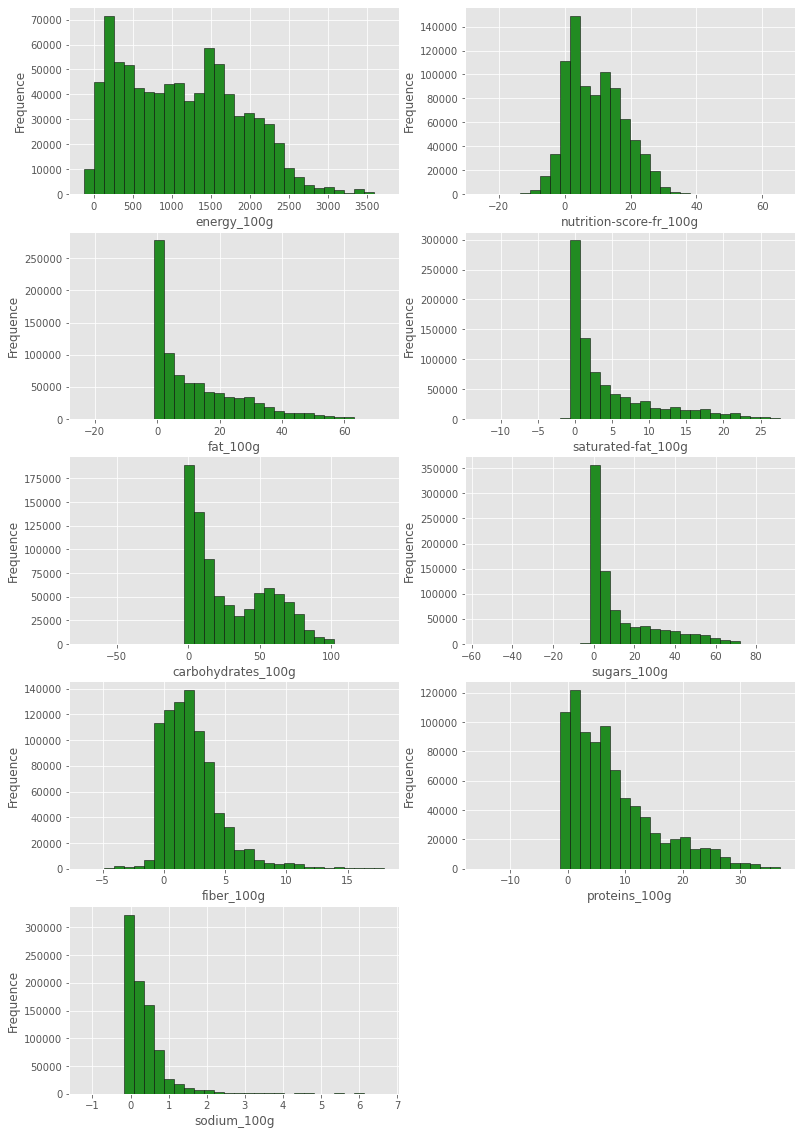

In [23]:
# Visualisation de la distribution des variables après imputation
distribution(df2)

L'imputation a généré des valeurs aberrantes. Les lignes entières qui les contiennent sont retirées par la suite.

In [24]:
# Création de la liste des variables
liste_var_2 = (list(df2.columns))

# Retrait des variables nutriscore de la liste des variables
liste_var_2.remove('nutrition-score-fr_100g')
liste_var_2.remove('energy_100g')

# Dataframe par catégorie
df_var_removed = df2.loc[:, liste_var_2]

df_nutri = round(df2.loc[:, ['nutrition-score-fr_100g']],0) # Arrondi au entier du nutriscore

df_energy = df2.loc[:, ['energy_100g']]

# Retrait des valeurs aberrantes crées par l'imputation
for col in df_var_removed:
    df_var_removed.drop(df_var_removed[(df_var_removed[col] < 0) | (
        df_var_removed[col] > 100)].index, inplace=True)

df_nutri.drop(df_nutri[(df_nutri['nutrition-score-fr_100g'] < -15)
                       | (df_nutri['nutrition-score-fr_100g'] > 40)].index, inplace=True)

df_energy.drop(df_energy[(df_energy['energy_100g'] < 0)
                       | (df_energy['energy_100g'] > 8400)].index, inplace=True)

# Concatenation
df3 = pd.concat([df_nutri, df_var_removed, df_energy], axis=1, join='inner')

Il serait intéressant d'avoir la variable nutriscore sous la forme "ABCDE".

Cependant cette dernière fournie par la base de données contient beaucoup de Nan (40.64%). Pour compenser, une tout autre variable similaire est calculé à partir de la variable nutriscore numérique nouvellement imputée.

Des "if blocks" et la fonction "map" sont uilisés de la manière suivante :

In [25]:
# Ajout de la variable nutricore grade calculée

# Fonction nutriscore numérique vers nutriscore grade
def num_to_letter(v):
    if -15 <= v <= -1:
        return 'A'
    elif 0 <= v <= 2:
        return 'B'
    elif 3 <= v <= 10:
        return 'C'
    elif 11 <= v <= 18:
        return 'D'
    elif 19 <= v <= 40:
        return 'E'

# liste des valeurs de df_nutri
liste_df_nutri = df_nutri['nutrition-score-fr_100g'].tolist()

# Application de la fonction via mapping
map_object = map(num_to_letter, liste_df_nutri)

# Ajout de la colonne
df3['nutriscore_grade'] = pd.DataFrame(map_object)

Le dataset contient 805015 lignes et 10 colonnes.
Il y a 0.01% de NaN.


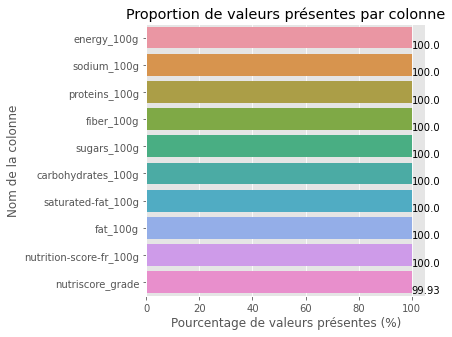

In [26]:
prop(df3, figsize=(5, 5))

In [27]:
# Retrait des lignes contenant des Nan
df3.dropna(how='any', inplace=True)

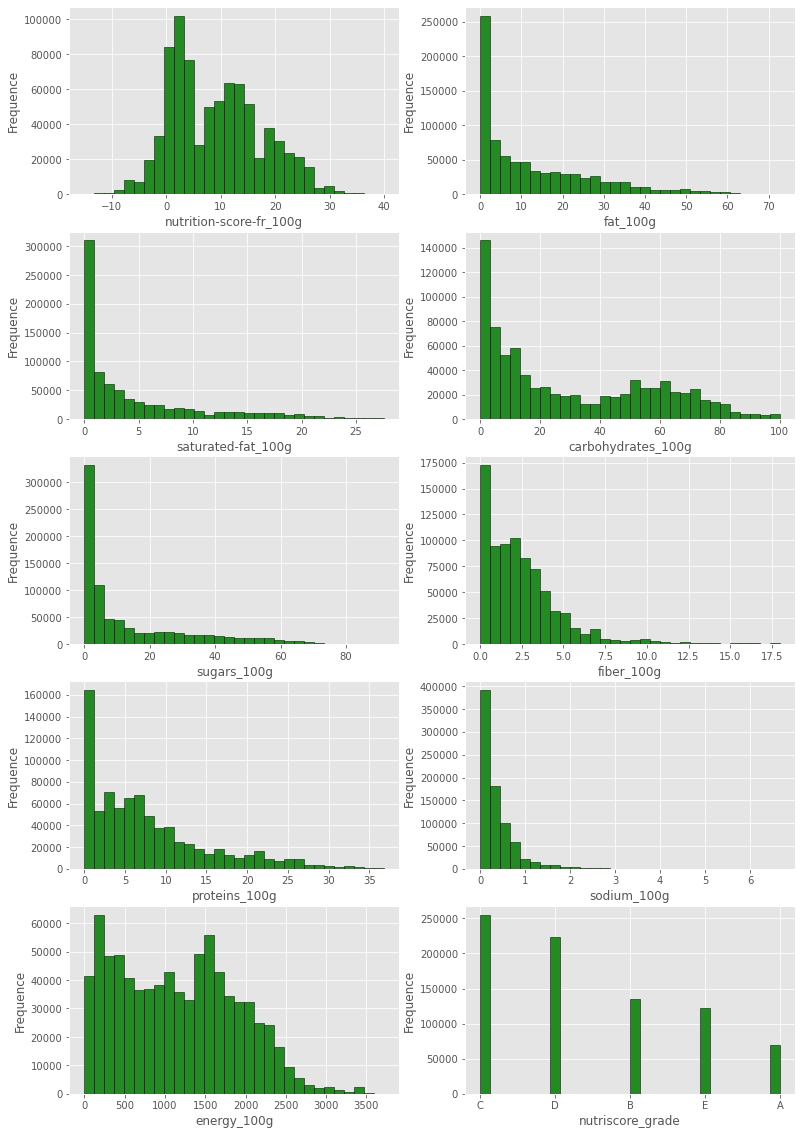

In [28]:
# Visualisation de la distribution des variables après nettoyage totale
distribution(df3)

In [29]:
# Affichage du dataset
df3.head(5)

,nutrition-score-fr_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,energy_100g,nutriscore_grade
0,9.0,7.000000,3.080000,70.100000,15.000000,4.018667,7.800000,0.560,1569.000000,C
1,18.0,8.200000,2.200000,29.000000,22.000000,0.000000,5.100000,1.840,936.000000,D
2,4.0,0.000000,0.000000,4.800000,0.400000,0.053558,0.200000,0.816,88.000000,C
3,4.0,3.000000,1.000000,10.000000,3.000000,0.735548,2.000000,0.460,251.000000,C
4,8.0,12.146477,4.608478,32.010373,15.797557,2.461938,6.628643,0.000,1140.132181,C


In [30]:
# Structure du dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804444 entries, 0 to 846345
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nutrition-score-fr_100g  804444 non-null  float64
 1   fat_100g                 804444 non-null  float64
 2   saturated-fat_100g       804444 non-null  float64
 3   carbohydrates_100g       804444 non-null  float64
 4   sugars_100g              804444 non-null  float64
 5   fiber_100g               804444 non-null  float64
 6   proteins_100g            804444 non-null  float64
 7   sodium_100g              804444 non-null  float64
 8   energy_100g              804444 non-null  float64
 9   nutriscore_grade         804444 non-null  object 
dtypes: float64(9), object(1)
memory usage: 67.5+ MB


In [31]:
# Exportation du dataset
df3.to_csv('dataset_clean_projet_3.csv')

## 6. Conclusion

Après nettoyage et sélection des colonnes pertinentes et de celles contenant suffisamment de données, seulement 10 variables ont été retenues sur 181. Elles se référent aux principales valeurs nutritionnelles indiquées sur les emballages des denrées alimentaires. Le dataset df3 crée sera utilisé dans le deuxième notebook pour être analysé. Ces analyses serviront à l'élaboration d'une idée d'application.